<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/QCKentei_1_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería de la confiabilidad




### Preparación

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
def ensure_and_move_to_folder(folder_name):
  current_dir = os.getcwd()
  target_path = os.path.join(current_dir, folder_name)

  if not os.path.exists(target_path):
    os.makedirs(target_path)
    print(f"Folder '{folder_name}' created successfully.")
  else:
    print(f"Folder '{folder_name}' already exists.")

  #os.chdir(target_path)

In [12]:
import os

folder_name = 'QC_Kentei'
ensure_and_move_to_folder(folder_name)

path = os.getcwd()

try:
  os.chdir(path + '/drive/My Drive/QC_Kentei')
except:
  pass

os.getcwd()

Folder 'QC_Kentei' created successfully.


'/content/drive/My Drive/QC_Kentei'

In [15]:
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

url = "https://docs.google.com/spreadsheets/d/1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo/edit?usp=sharing"
ss = gc.open_by_url(url)

In [16]:
!pip install japanize-matplotlib

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

## 11-01 Ingeniería de la confiabilidad

### 1. Ingenieria de la confiabilidad
 * La confiabilidad se define como la capacidad de un artículo para desempeñar su función durante un período determinado sin fallar, bajo condiciones específicas.

 * La confiabilidad $ R $ se refiere a la probabilidad de que un artículo realice su función correctamente durante el intervalo de tiempo $ (t_1, t_2) $, bajo condiciones dadas, y se expresa como $ R = 1-F $ (donde F es la no confiabilidad)

 * Confiabilidad de un sistema en serie

 $ R = R_1 \times R_2 \times ... \times R_n $

 * Confiabilidad de un sistema en paralelo

 $ R = 1 - (1 - R_1) \times (1-R_2) \times ... \times (1 - R_n) $


## 11.1

信頼度が80%のA部品を三つ用いて直列に結合した時の信頼度を求めよ。また、A部品を用いて、システムの信頼度を99%以上にするためには、少なくと何個の部品を用いて並列系を構成する必要があるかを求めよ。

Determina la confiabilidad cuando tres componentes A, cada uno con una confiabilidad del 80%, se conectan en serie. Además, calcula cuántos componentes A se necesitan en paralelo para que la confiabilidad del sistema sea de al menos del 99%.



In [18]:
# Confiabilidad cuando tres componentes A con una confiabilidad del 80% están conectado en serie.

def series_reliability(r, n):
    return r ** n

# Determinar el número mínimo de componentes A con una confiabilidad 80% conectados
# en paralelo para lograr una confiabilidad del sistema de al menos el 99%

def required_parallel_units(r, target):
    n = 1
    while 1 - (1 - r) ** n < target:
        n += 1
    return n

# Confiabilidad del componente A
r_A = 0.8

# Confiabilidad en conexión en serie
series_r = series_reliability(r_A, 3)
print(f"Confiabilidad cuando tres componentes A están conectados en serie: {series_r:.4f}")

# Número mínimo de componentes en conecxión en paralelo para alcanzar al menos un 99% de confiabilidad
min_parallel_units = required_parallel_units(r_A, 0.99)
print(f"Número mínimo de componentes A necesarios para que la confiabilidad del sistema sea de la menos el 99%: {min_parallel_units}")

Confiabilidad cuando tres componentes A están conectados en serie: 0.5120
Número mínimo de componentes A necesarios para que la confiabilidad del sistema sea de la menos el 99%: 3


### 1. FMEA (Failure Modes and Effects Analysis)

Es un método para analizar los modos de fallo de los componentes y su impacto en los elementos superiores, con el fin de identificar posibles defectos.

### 2. FTA (Fault Tree Analysis)

Es un método para analizar los modos de fallo y las probabilidades de su ocurrencia utilizando símbolos lógicos, expandiendo los sucesos en un diagrama de árbol, retrocediendo a lo largo de la secuencia de eventos, y analizando las rutas y causas de ocurrencia.

### 3. DR (Design Review)

Debido a la complejización de las funciones del producto, depender únicamente de uno o pocos técnicos puede dar lugar a errores, omisiones o fallos relacionados con las nuevas tecnologías. Este enfoque busca prevenir estos problemas de manera proactiva y mejorar el nivel de diseño del producto mediante la integración de las perspectivas de un grupo más amplio de expertos.


### 2. Durabilidad, Mantenibilidad y Fiabilidad del deseño

#### (1) Durabilidad:
* Robustez
* Fiabilidad R
* MTTF (Tiempo Medio Hasta Fallo)
* Vida B10
* Tasa de fallos $ \lambda $
* MTBF (Tiempo Medio Entre Fallos=

#### (2) Mantenibilidad:
* Facilidad de reparación
* Mantenimiento correctivo
* Mantenimiento preventivo
* Índice de mantenibilidad R
* MTTR (Tiempo Medio de Reparación

#### (3) Fiabilidad del diseño:
* Prevención de errores
* Sistemas a prueba de fallos
Fallo suave (sin daño completo)
* Fallo suave (progresivo)


## 11.2

ある部品について、寿命の平均値が1200時間、標準偏差が20時間の正規分布に従うとき、B10ライフを求めよ。

Para un determinado componente cuya vida útil sigue una distribución normal con una media de 1200 horas y una desviación estándar de 20 horas, determina la vida B10.





In [ ]:
import scipy.stats as stats

# Vida útil promedio y desviación estándar
mean_life = 1200
std_dev = 20

# Cálculo de la vida B10 (percentil inferior del 10%)
b10_life = stats.norm.ppf(0.10, loc=mean_life, scale=std_dev)

print(f"Vida B10: {b10_life:.2f} horas")

Vida B10: 1174.37 horas


## 11.3

６台のシステムの故障データは次のとおりであり、寿命分布は指数分布に従うとき、MTBFの点推定値と故障率λを求めよ。653,780,798,854,911,1038（時間）

Los datos de fallos de seis sistemas son los siguientes: 653, 780, 798, 911 y 1038 horas.

Si la distribución de vida sigue una distribución exponencial, determina la estimación puntual del MTBF y la tasa de fallos $ \lambda $.

In [ ]:
# Datos de fallos
failure_times = [653, 780, 798, 854, 911, 1038]

# Cálculo del MTBF（Tiempo Medio Entre Fallos）
mtbf = sum(failure_times) / len(failure_times)

# Cálculo de la tasa de fallos λ （λ = 1/MTBF）
failure_rate = 1 / mtbf

print(f"MTBF（Fallos por unidad de tiemp）: {mtbf:.2f} horas")
print(f"Tasa de fallos λ: {failure_rate:.4f} （fallos/horas）")


MTBF（Fallos por unidad de tiemp）: 839.00 horas
Tasa de fallos λ: 0.0012 （fallos/horas）


## 11.4

故障した場合に修理を考える修理系では、耐久性と保全性を同時に考慮し総合的に評価する尺度としてアベイラビリティが用いられる。アベイラビリティを求める式に用いる耐久性の尺度と保全性の尺度について答え、それらの尺度を用いてアベイラビリティの計算式を答えよ。

En los sistemas de reparación donde se considera la reparación en caso de fallos, se utiliza la disponibilidad como un indicador integral que evalúa simultáneamente la durabilidad y la mantenibilidad. Responde sobre las métricas de durabilidad y mantenibilidad que se utilizan en la fórmula para calcular la disponibilidad y proporciona la fórmula de cálculo de la disponibilidad utilizando estas métricas.



La disponibilidad en un sistema de reparación se calcula como la relación entre el tiempo de funcionamiento del sistema (tiempo de actividad) y el tiempo total, cuando se divide en tiempo de actividad y tiempo de inactividad (tiempo de reparación).
* Métrica de durabilidad: MTBF (Tiempo Medio Entre Fallos)
* Métrica de mantenibilidad: MTTR (Tiempo Medio de Reparación)
* Disponibilidad = MTBF / (MTBF + MTTR)


## 11-02 Cómo resumir y analizar los datos de confiabilidad

### 1. Distribución de Weibull
* Función de distribución de la distribución de Weibull: No confiabilidad F(t)
* Parámetro de ubicación
* Parámetro de forma
* Curva en forma de de bañera
* Parámetro de escala


## 11-02

ある部品の寿命データをワイブル確率紙で解析し、図１１．４の結果を得た。以下の設問に答えよ。
1. 形状パラメータ $ m $ を求め、故障パターンを答えよ。
2. 尺度パラメータ $ \eta $ を求めよ。
3. 3000時間での部品信頼度を求めよ。

Se realizó un análisis de los datos de vida útil de un componente utilizando el papel de probabilidad de Weibull, y se obtuvo el resultado mostrado en la Figura 11.4. Responda las siguientes preguntas:
1. Calcule el parámetro de forma $ m $ y determine el patrón de fallas.
2. Calcule el parámetro de escala $ \eta $.
3. Calcule la fiabilidad del componente a las 3000 horas.

In [ ]:
# Obtener los datos (como lista)
st = ss.worksheet("Sheet18")
list_of_lists = st.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.apply(pd.to_numeric)

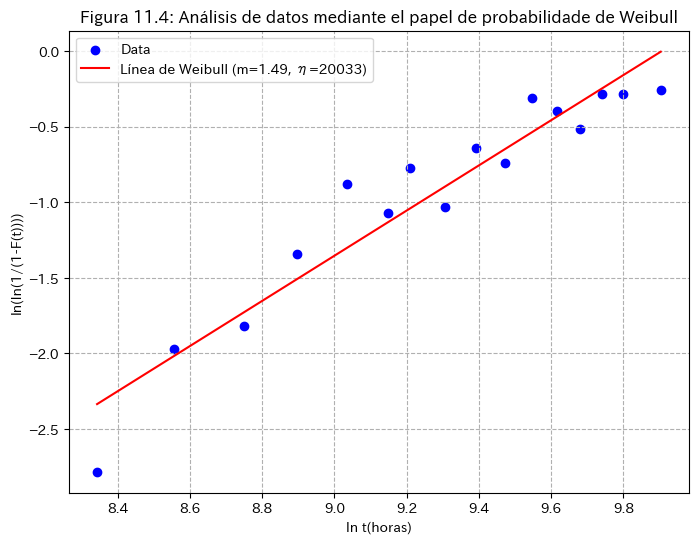

Parámetro de forma estimado m = 1.49
Parámetro de escala estimado η = 20033
t = Fiabilidad R(t) en 3000: 0.943


In [ ]:
from scipy.stats import linregress
import matplotlib.ticker as ticker

# Data
Time = df['Time']
F = df['F']

# Eje Y transformado a Weibull
Y = np.log(np.log(1 / (1 - F)))

# Eje X transformado a logaritmo
X = np.log(Time)

# Estimación de los parámetros de Weibull mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Cálculo del parámetro de forma m y del parámetro de escala η
m = slope
eta = np.exp(-intercept / m)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, slope * X + intercept, color='red', label=f'Línea de Weibull (m={m:.2f}, η={eta:.0f})')


#
plt.xlabel("ln t(horas)")
plt.ylabel("ln(ln(1/(1-F(t))))")
plt.title("Figura 11.4: Análisis de datos mediante el papel de probabilidad de Weibull")

#
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Representacion del parámetro de forma m y η
print(f"Parámetro de forma estimado m = {m:.2f}")
print(f"Parámetro de escala estimado η = {eta:.0f}")

# Cálculo de la fiabilidad a t=3000
t = 3000
R_t = np.exp(- (t / eta) ** m)

#
print(f"t = Fiabilidad R(t) en {t}: {R_t:.3f}")


## 2. Datos censurados a mitad de periodo

* Datos censurados a tiempo
* Datos censurados a tiempo (Tipo II)
* Datos censurados aleatoriamente

## 11.6

ある部品についてサンプル数 $ n = 7 $で寿命試験を行った。その結果を表１１．２に示す。〇印は故障前に中途打ち切りしたデータでｘ印は故障を示す。以下の設問に答えよ。
1. 表１１．２のデータ打ち切りデータの区分は何かを答えよ。
2. Ｎｏ４の故障データ４５０００時間における累積ハザード関数$ H(t) $を求めよ。

Se realizó una prueba de vida útil en un determinado componente con un tamaño de muestra de $ n=7 $. Los resultados se muestran en la Table 11.2. El símbolo $ \bigcirc $ indica datos censurados antes de la falla, mientras que el símbolo $ \times $ indica fallas. Responda las siguientes preguntas:
1. ¿Cuál es la clasificación de los datos censurados en la Tabla 11.2?
2. Calcula la función de riesgo acumulada $ H(t) $ en $ t=45000 $ horas para el dato de falla del No.4.


In [ ]:
# Data
data_dict = {
    "No": [1, 2, 3, 4, 5, 6, 7],
    "Data (Hora)": [25, 34, 38, 45, 51, 54, 68],
    "〇／✕": ['✕', '✕', '〇', '✕', '〇', '✕', '✕']
}

df = pd.DataFrame(data_dict)

print("Tabla 11.2: Resultados de la prueba de vida útil (unidad: x1000 horas) ")
print(df.to_string(index=False))

# ① Clasificación de los datos censuados
censored_types = "Los datos de 38 horas y 51 horas son censurados aleatoriamente (censura por la derecha）"

# ② Cálculo de la función de riesgo acumulada H(t) mediante el método de Nelson-Aalen
df_sorted = df.sort_values("Data (Hora)").reset_index(drop=True)

# Extraer solo los datos de fallos
failure_times = df_sorted[df_sorted["〇／✕"] == '✕']["Data (Hora)"].values

# Cálculo de H(t)
H_t_values = []
H_t = 0
n = len(df)  # Número inicial de sujetos de prueba

for i, t_i in enumerate(failure_times):
    r_i = n - i  # Número de suetos de prueba que sobreviven en el tiempo t_i
    H_t += 1 / r_i
    H_t_values.append((t_i, H_t))

# H(t) en el tiempo de 45,000 horas para el No.4
H_45000 = next(H for t, H in H_t_values if t == 45)

'''
# Cálculo de la función de riesto acumulada H(t)（método Kaplan-Meier）
failure_times = np.array([25, 34, 45, 54, 68])  # Solo datos de fallos
n = len(df)  # Tamaño de la muestra 7
H_t = sum(1 / (n - i) for i in range(len(failure_times)) if failure_times[i] <= 45)
'''

#
print("\n【Respuesta】")
print(f"1. Clasificación de los datos censurados: ")
print(f"   {censored_types}")
print(f"2. Función de riesgo acumulada H(t) para el No.4（45,000 horas）: {H_45000:.3f}")


Tabla 11.2: Resultados de la prueba de vida útil (unidad: x1000 horas) 
 No  Data (Hora) 〇／✕
  1           25   ✕
  2           34   ✕
  3           38   〇
  4           45   ✕
  5           51   〇
  6           54   ✕
  7           68   ✕

【Respuesta】
1. Clasificación de los datos censurados: 
   Los datos de 38 horas y 51 horas son censurados aleatoriamente (censura por la derecha）
2. Función de riesgo acumulada H(t) para el No.4（45,000 horas）: 0.510
